<a href="https://colab.research.google.com/github/Jleytong/Se-alesySistemas/blob/main/Copia_de_youtube_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#cargar datos desde drive acceso libre
FILEID = "1StwlmGvyfZuVELc9stOMNjtaKlt2_NGD"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-05-26 22:49:13--  https://docs.google.com/uc?export=download&confirm=&id=1StwlmGvyfZuVELc9stOMNjtaKlt2_NGD
Resolving docs.google.com (docs.google.com)... 108.177.96.102, 108.177.96.139, 108.177.96.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1StwlmGvyfZuVELc9stOMNjtaKlt2_NGD&export=download [following]
--2025-05-26 22:49:13--  https://drive.usercontent.google.com/download?id=1StwlmGvyfZuVELc9stOMNjtaKlt2_NGD&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.127.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9567 (9.3K) [application/octet-stream]
Saving to: ‘canciones.xlsx’

canciones.xlsx      100%[===================>]   9.34K  --.-K

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

link        band       type  \
0  https://youtu.be/F1_aOX0acbY?si=sYnufzi1F2ZZ5f6I       Beele  Reggaeton   
1  https://youtu.be/Lf566pMNCOw?si=lgNym-2gex1XTJDv      Blessd  Reggaeton   
2  https://youtu.be/zcw8NlHljF4?si=-cFcMU0ZNVh_hD6N      Blessd  Reggaeton   
3  https://youtu.be/NjeGb-mOHKc?si=cvpznOHiMb0JEOfR  RyanCastro  Reggaeton   
4  https://youtu.be/a1Femq4NPxs?si=pbSivIlLD-Ml64el    BadBunny  Reggaeton   
5  https://youtu.be/5qm8PH4xAss?si=mkOhzg027tLr9P23      50cent        Rap   
6  https://youtu.be/yOX7cfNhdzQ?si=iFAdml1sDv-S58J5     Penyair        Rap   
7  https://youtu.be/FEbBEAzqqtg?si=YTPQLg8XWbKa4Ii0  Canserbero        Rap   
8  https://youtu.be/XQWKBRuUWw4?si=M7roV2HnddY0OhVL     Penyair        Rap   
9  https://youtu.be/XbGs_qK2PQA?si=zg90CKEDTfQtSZLj      Eminem        Rap   

   type_Num  
0         1  
1         1  
2         1  
3         1  
4         1  
5         2  
6         2  
7         2  
8         2  
9         2

In [3]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     / 2.8 MB 10.2 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.5.22-py3-none-any.whl size=3011529 sha256=e677d7c61312dcfb6e0b0a041d47bf88f2f2711ddf9a7be3f310b1824cfb8a06
  Stored in directory: /tmp/pip-ephem-wheel-cache-1c5zrqww/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [4]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_Num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 10
link: https://youtu.be/F1_aOX0acbY?si=sYnufzi1F2ZZ5f6I

band: Beele

type: Reggaeton

[youtube] Extracting URL: https://youtu.be/F1_aOX0acbY?si=sYnufzi1F2ZZ5f6I
[youtube] F1_aOX0acbY: Downloading webpage
[youtube] F1_aOX0acbY: Downloading tv client config
[youtube] F1_aOX0acbY: Downloading player 59b252b9-main
[youtube] F1_aOX0acbY: Downloading tv player API JSON
[youtube] F1_aOX0acbY: Downloading ios player API JSON
[youtube] F1_aOX0acbY: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=F1_aOX0acbY
[youtube] F1_aOX0acbY: Downloading webpage
[youtube] F1_aOX0acbY: Downloading tv client config
[youtube] F1_aOX0acbY: Downloading tv player API JSON
[youtube] F1_aOX0acbY: Downloading ios player API JSON
[youtube] F1_aOX0acbY: Downloading m3u8 information
[info] F1_aOX0acbY: Downloading 1 format(s): 251
[download] Destination: results/Beele_0_1.mp3
[download] 100% of    2.56MiB in 00:00:00 at 31.32MiB/s  
Download complete... results/Beele

In [5]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Beele_0_1.wav',
 'Penyair_6_2.wav',
 'Blessd_1_1.wav',
 'Canserbero_7_2.wav',
 'RyanCastro_3_1.wav',
 'Eminem_9_2.wav',
 'Blessd_2_1.wav',
 'Penyair_8_2.wav',
 '50cent_5_2.wav',
 'BadBunny_4_1.wav']

In [6]:
!pip install soundfile #instalar sondfile

In [7]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: Beele_0_1.wav; segundo 40:45; tipo música [1.]
1 lectura: Beele_0_1.wav; segundo 50:55; tipo música [1.]
2 lectura: Beele_0_1.wav; segundo 60:65; tipo música [1.]
3 lectura: Beele_0_1.wav; segundo 70:75; tipo música [1.]
4 lectura: Beele_0_1.wav; segundo 80:85; tipo música [1.]
5 lectura: Beele_0_1.wav; segundo 90:95; tipo música [1.]
6 lectura: Beele_0_1.wav; segundo 100:105; tipo música [1.]
7 lectura: Penyair_6_2.wav; segundo 40:45; tipo música [2.]
8 lectura: Penyair_6_2.wav; segundo 50:55; tipo música [2.]
9 lectura: Penyair_6_2.wav; segundo 60:65; tipo música [2.]
10 lectura: Penyair_6_2.wav; segundo 70:75; tipo música [2.]
11 lectura: Penyair_6_2.wav; segundo 80:85; tipo música [2.]
12 lectura: Penyair_6_2.wav; segundo 90:95; tipo música [2.]
13 lectura: Penyair_6_2.wav; segundo 100:105; tipo música [2.]
14 lectura: Blessd_1_1.wav; segundo 40:45; tipo música [1.]
15 lectura: Blessd_1_1.wav; segundo 50:55; tipo música [1.]
16 lectura: Blessd_1_1.wav; segundo 60:65; tip

(70, 240000, 2)

In [20]:
from IPython.display import Audio #reproducir segmento
i = 0
Audio(x_t[i].T,rate=fs)

In [9]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(70, 120001)

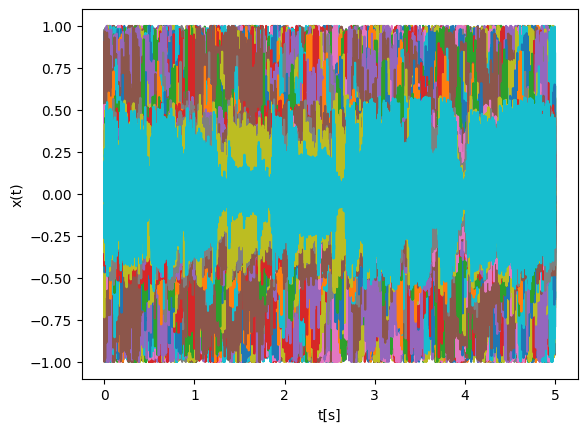

In [10]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

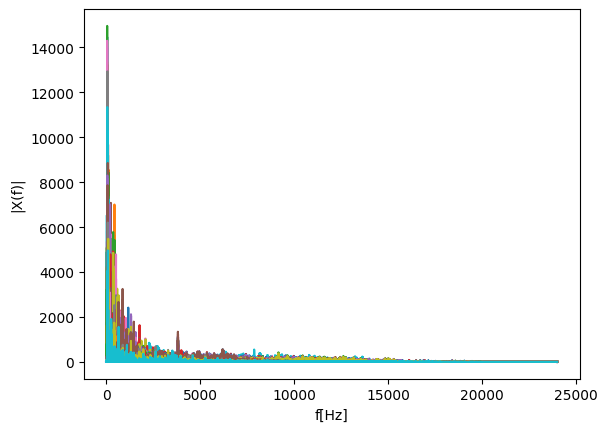

In [11]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

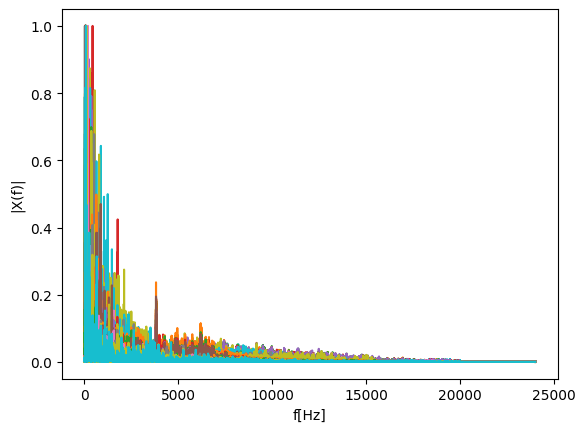

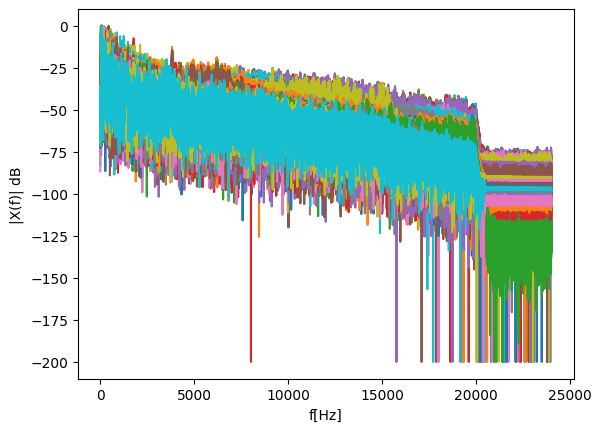

In [12]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

**Nota**: Generalmente el espectro se presenta en [decibeles [dB]](https://es.wikipedia.org/wiki/Decibelio)

In [13]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

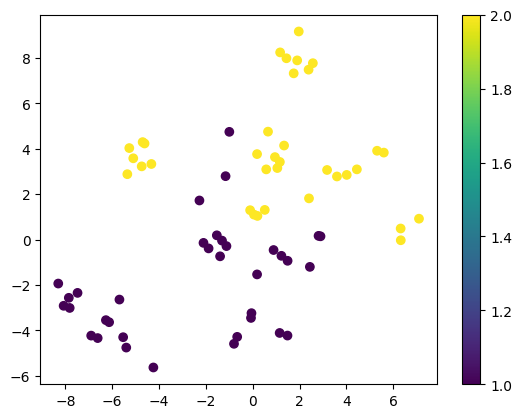

<ipython-input-14-6e94555dcd77>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


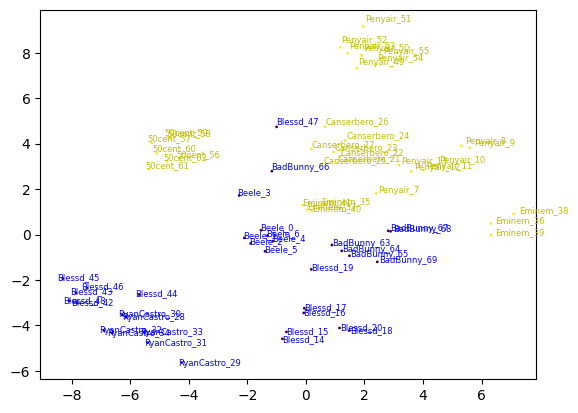

In [14]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [15]:
#reproducir audio
i = 69
Audio(x_t[i].T,rate=fs)

In [16]:
i = 14
Audio(x_t[i].T,rate=fs)

In [17]:
import joblib
#guardar modelo
os.mkdir('modelo')
filename_ = 'modelo/reggaeton_vs_metal'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")


['modelo/reggaeton_vs_metal.pkl']

In [18]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])